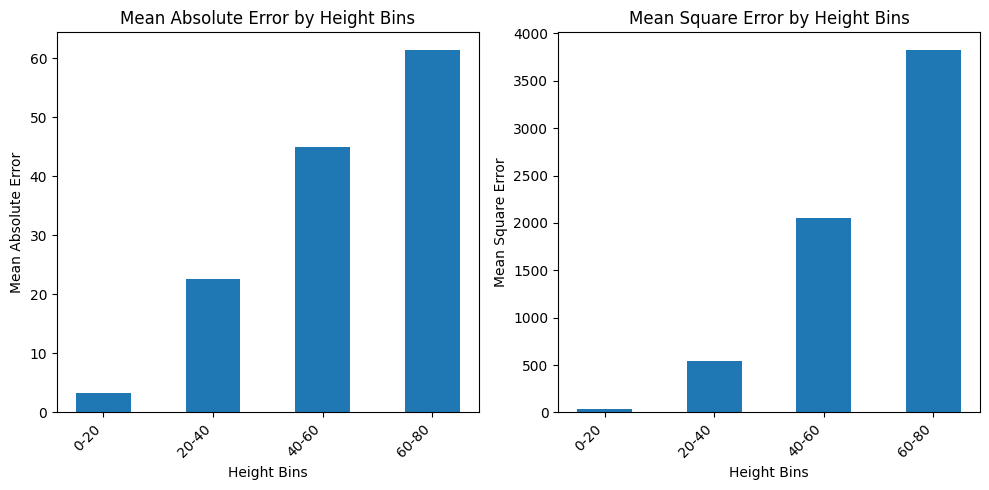

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the bin edges
bin_edges = np.arange(0, 100, 20)  # Define your desired bin edges here

# Initialize lists to store the absolute errors, square errors, and heights
absolute_errors = []
square_errors = []
heights = []
real_mask_values = []
predicted_mask_values = []

# Iterate over the images in the predicted folder
predicted_folder = 'data/test_dataset/predicted_baseline'
real_mask_folder = 'data/test_dataset/masks'

for predicted_filename in os.listdir(predicted_folder):
    if predicted_filename.endswith('_OUT.png'):
        # Extract the file ID from the predicted image filename
        file_id = os.path.splitext(predicted_filename)[0]

        # Construct the corresponding mask image filename
        mask_filename = file_id.replace('_BAM_OUT', '') + '_AGL.tif'

        # Load the predicted image
        predicted_img = np.array(Image.open(os.path.join(predicted_folder, predicted_filename)))
        real_mask_img = np.array(Image.open(os.path.join(real_mask_folder, mask_filename)))

        # Calculate the absolute error between predicted and real heights
        absolute_error = np.abs(predicted_img - real_mask_img)
        square_error = (predicted_img - real_mask_img) ** 2

        # Flatten the error and real height arrays
        flat_error = absolute_error.flatten()
        flat_square_error = square_error.flatten()
        flat_height = real_mask_img.flatten()
        flat_real_mask_values = real_mask_img.flatten()
        flat_predicted_mask_values = predicted_img.flatten()

        # Digitize the heights into bins
        bins = np.digitize(flat_height, bins=bin_edges)

        # Store the error, square error, and height information
        absolute_errors.extend(flat_error)
        square_errors.extend(flat_square_error)
        heights.extend(flat_height)
        real_mask_values.extend(flat_real_mask_values)
        predicted_mask_values.extend(flat_predicted_mask_values)

# Convert lists to numpy arrays
absolute_errors = np.array(absolute_errors)
square_errors = np.array(square_errors)
heights = np.array(heights)
real_mask_values = np.array(real_mask_values)
predicted_mask_values = np.array(predicted_mask_values)

# Digitize the heights into bins
bins = np.digitize(heights, bins=bin_edges)

# Calculate the mean absolute error (MAE) and mean square error (MSE) for each bin
mean_absolute_errors = []
mean_square_errors = []
for i in range(1, len(bin_edges)):
    bin_indices = np.where(bins == i)
    bin_absolute_error = absolute_errors[bin_indices]
    bin_square_error = square_errors[bin_indices]
    mean_absolute_error = np.mean(bin_absolute_error)
    mean_square_error = np.mean(bin_square_error)
    mean_absolute_errors.append(mean_absolute_error)
    mean_square_errors.append(mean_square_error)

# Plot the mean absolute error (MAE) and mean square error (MSE) for each bin
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(mean_absolute_errors)), mean_absolute_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(range(len(mean_square_errors)), mean_square_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

(256, 256)


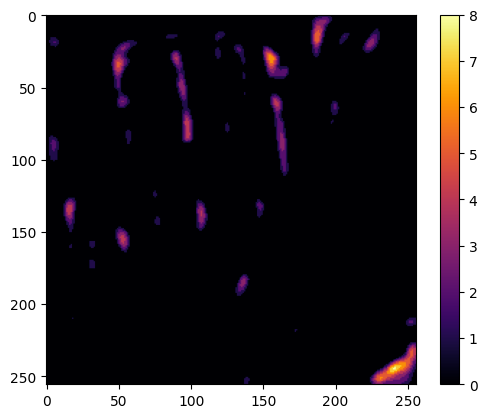

In [12]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

image=Image.open(Path('./data/test_dataset/predicted_baseline/DEU_09_20_3_1_BAM_OUT.png'))
image_array=np.asarray(image)
print(image_array.shape)
# Plot the image with colormap
plt.imshow(np.asarray(image), cmap='inferno')  # Use the 'gray' colormap for grayscale images
plt.colorbar()  # Add a colorbar to show the mapping of pixel values to colors
plt.show()

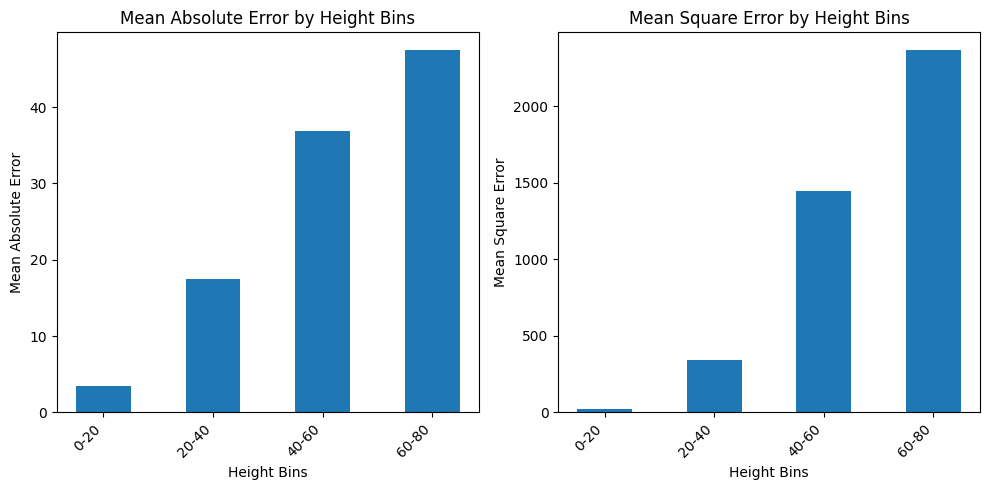

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the bin edges
bin_edges = np.arange(0, 100, 20)  # Define your desired bin edges here

# Initialize lists to store the absolute errors, square errors, and heights
absolute_errors = []
square_errors = []
heights = []
real_mask_values = []
predicted_mask_values = []

# Iterate over the images in the predicted folder
predicted_folder = 'data/test_dataset/predicted_modified'
real_mask_folder = 'data/test_dataset/masks'

for predicted_filename in os.listdir(predicted_folder):
    if predicted_filename.endswith('_OUT.png'):
        # Extract the file ID from the predicted image filename
        file_id = os.path.splitext(predicted_filename)[0]

        # Construct the corresponding mask image filename
        mask_filename = file_id.replace('_BAM_OUT', '') + '_AGL.tif'

        # Load the predicted image
        predicted_img = np.array(Image.open(os.path.join(predicted_folder, predicted_filename)))
        real_mask_img = np.array(Image.open(os.path.join(real_mask_folder, mask_filename)))

        # Calculate the absolute error between predicted and real heights
        absolute_error = np.abs(predicted_img - real_mask_img)
        square_error = (predicted_img - real_mask_img) ** 2

        # Flatten the error and real height arrays
        flat_error = absolute_error.flatten()
        flat_square_error = square_error.flatten()
        flat_height = real_mask_img.flatten()
        flat_real_mask_values = real_mask_img.flatten()
        flat_predicted_mask_values = predicted_img.flatten()

        # Digitize the heights into bins
        bins = np.digitize(flat_height, bins=bin_edges)

        # Store the error, square error, and height information
        absolute_errors.extend(flat_error)
        square_errors.extend(flat_square_error)
        heights.extend(flat_height)
        real_mask_values.extend(flat_real_mask_values)
        predicted_mask_values.extend(flat_predicted_mask_values)

# Convert lists to numpy arrays
absolute_errors = np.array(absolute_errors)
square_errors = np.array(square_errors)
heights = np.array(heights)
real_mask_values = np.array(real_mask_values)
predicted_mask_values = np.array(predicted_mask_values)

# Digitize the heights into bins
bins = np.digitize(heights, bins=bin_edges)

# Calculate the mean absolute error (MAE) and mean square error (MSE) for each bin
mean_absolute_errors = []
mean_square_errors = []
for i in range(1, len(bin_edges)):
    bin_indices = np.where(bins == i)
    bin_absolute_error = absolute_errors[bin_indices]
    bin_square_error = square_errors[bin_indices]
    mean_absolute_error = np.mean(bin_absolute_error)
    mean_square_error = np.mean(bin_square_error)
    mean_absolute_errors.append(mean_absolute_error)
    mean_square_errors.append(mean_square_error)

# Plot the mean absolute error (MAE) and mean square error (MSE) for each bin
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(mean_absolute_errors)), mean_absolute_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(range(len(mean_square_errors)), mean_square_errors, align='center', width=0.5)
plt.xlabel('Height Bins')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error by Height Bins')
plt.xticks(range(len(bin_edges) - 1), [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)], rotation=45, ha='right')

plt.tight_layout()
plt.show()


(256, 256)


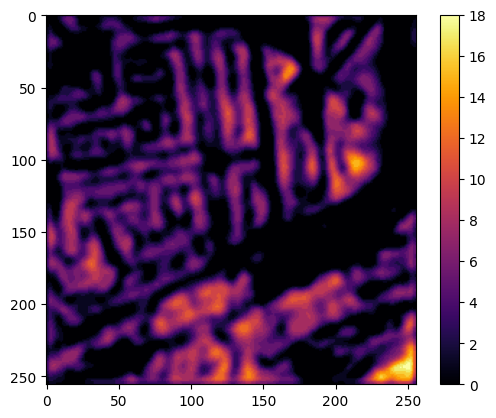

In [14]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

image=Image.open(Path('./data/test_dataset/predicted_modified/DEU_09_20_3_1_BAM_OUT.png'))
image_array=np.asarray(image)
print(image_array.shape)
# Plot the image with colormap
plt.imshow(np.asarray(image), cmap='inferno')  # Use the 'gray' colormap for grayscale images
plt.colorbar()  # Add a colorbar to show the mapping of pixel values to colors
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\luism\\.conda\\envs\\SeminarARS\\lib\\site-packages\\matplotlib\\pyplot.py'>

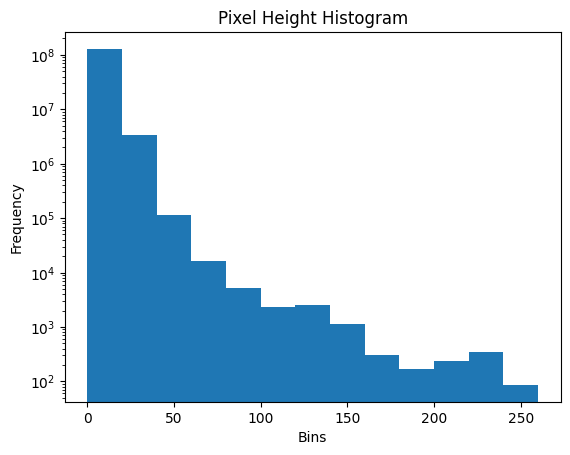

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Provided histogram data
bin_edges = np.arange(0, 265, 20)
histogram_data=pd.read_csv('weights.csv')['Histogram']
# Calculate the histogram by summing values in bins
histogram_sum = np.zeros(len(bin_edges) - 1)
for i, val in enumerate(histogram_data):
    bin_index = np.digitize([i], bin_edges) - 1  # Find the index of the bin
    histogram_sum[bin_index] += val  # Sum the value into the corresponding bin

# Plot the histogram
plt.bar(bin_edges[:-1], histogram_sum, width=np.diff(bin_edges), align='edge')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Pixel Height Histogram')
plt.yscale('log')
plt